## Evaluation

##### 1. Load your zillow dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# my modules
import acquire as a
import prepare as p
import wrangle as w
import evaluate as e

In [2]:
train, val, test = w.wrangle_zillow()
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1691775,3,1.0,944.0,239885.0,1951,4407.69,6037.0
1336667,4,2.0,1254.0,390000.0,1960,4869.32,6037.0
1041047,3,3.0,3429.0,631904.0,1958,7833.45,6037.0
1530579,3,2.0,1187.0,447299.0,1941,5271.25,6037.0
174339,3,2.0,1326.0,873115.0,1938,10591.38,6037.0


##### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

##### Sample code to get started:

In [3]:
from sklearn.linear_model import LinearRegression

# # assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)


In [4]:
X_train = train[['area']]
y_train = train.tax_value

In [5]:
lm_1 = LinearRegression()

lm_1.fit(X_train, y_train)

train['yhat'] = lm_1.predict(X_train)

##### 3. Plot the residuals for the linear regression model that you made.



In [27]:
train['residuals'] = train.yhat - train.tax_value

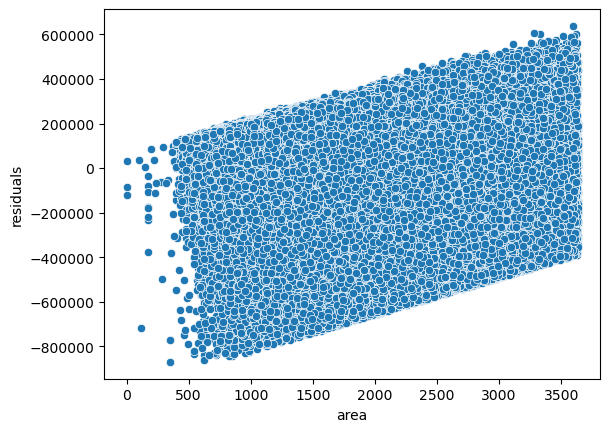

In [28]:
sns.scatterplot(x='area', y='residuals', data=train)
plt.show()

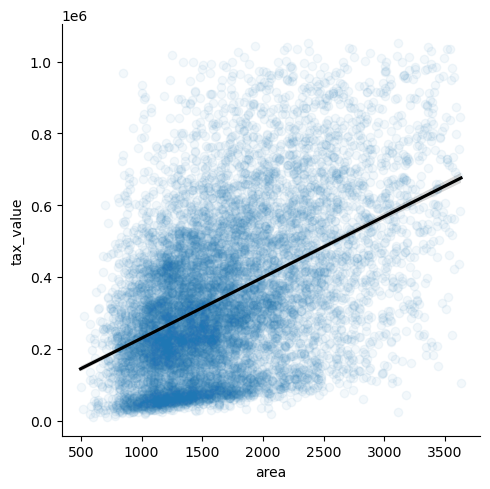

In [6]:
# technically, this is not a plot of the residuals, but
# it is a good visualization of them by plotting actual y
# v. the regression line

import seaborn as sns

t_small = train.sample(10_000)

sns.lmplot(x='area', y='tax_value',
            data = t_small, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.05})
plt.show()

##### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.





In [8]:
# SSE 'Sum of Squared Errors' is ((y^ - y)**2).sum()
SSE = ((train.yhat - train.tax_value) ** 2).sum()
SSE

3.936509163309212e+16

In [9]:
# ESS 'Explained Sum of Squares' is ((y - baseline)**2).sum()
# Make a baseline based on mean tax value
train['baseline'] = train.tax_value.mean()

ESS = ((train.yhat - train.baseline)**2).sum()
ESS

1.0200477299545784e+16

In [10]:
# TSS 'Total Sum of Squares' is ((yhat - baseline)**2).sum()

TSS = ((train.tax_value - train.baseline)**2).sum()
TSS

4.9565568932639464e+16

In [26]:
ESS + SSE

4.95655689326379e+16

In [11]:
# MSE 'Mean Squared Error' = SSE / len(train)
MSE = SSE / len(train)
MSE

36869850744.272026

In [12]:
# RMSE 'Root Mean Squared Error' is MSE ** (1/2)
RMSE = MSE ** (1/2)
RMSE

192015.23570871147

In [13]:
# This seems like a very large error for this model when
# the mean tax value is about $342k
train.tax_value.mean()

341927.1213185261

##### This can also be answered by using scikitlearn's MSE function

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
MSE = mean_squared_error(train.tax_value, train.yhat)
MSE

36869850744.272026

In [24]:
SSE = MSE * len(train)
SSE

3.936509163309212e+16

In [25]:
RMSE = MSE ** (1/2)
RMSE

192015.23570871147

In [ ]:
# 

##### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [14]:
SSE_b = ((train.baseline - train.tax_value) ** 2).sum()
SSE_b

4.9565568932639464e+16

In [15]:
MSE_b = (SSE_b / len(train))
MSE_b

46423748879.7075

In [16]:
RMSE_b = MSE_b ** (1/2)
RMSE_b

215461.7109365548

##### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [17]:
if SSE_b - SSE > 0:
    print(f'The model lm_1 SSE outperformed the baseline SSE by {(SSE_b - SSE)/SSE_b:.2%}')
else:
    print(f'The model lm_1 SSE was outperformed by the baseline by {(SSE - SSE_b)/SSE:.2%}')

The model lm_1 SSE outperformed the baseline SSE by 20.58%


##### 7. What is the amount of variance explained in your model?



In [18]:
# The amount of variance R-squared, which is the ESS / TSS or (yhat-baseline)/(y-baseline)
R2 = ESS / TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.206
Percent of variance in y explained by x =  20.6 %


##### 8. Is your model better than the baseline model?

Yes, model lr_1 explains more of the variance in y than having no model.

##### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


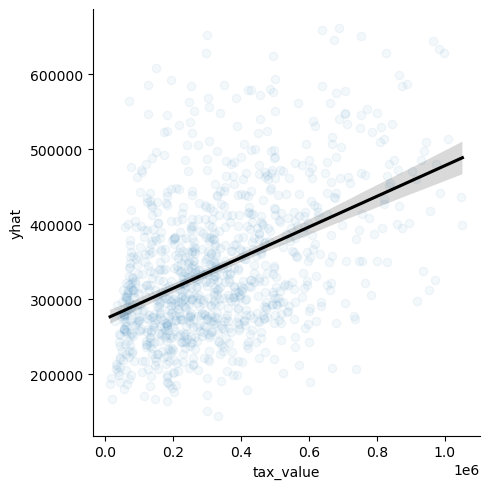

In [19]:
e.plot_residuals(train, 'tax_value', 'yhat')

In [20]:
e.regression_errors_mean(train, 'tax_value', 'yhat')

(3.936509163309212e+16,
 1.0200477299545784e+16,
 4.9565568932639464e+16,
 36869850744.272026,
 192015.23570871147,
 0.20579764379197227,
 {'SSE': 3.936509163309212e+16,
  'ESS': 1.0200477299545784e+16,
  'TSS': 4.9565568932639464e+16,
  'MSE': 36869850744.272026,
  'RMSE': 192015.23570871147,
  'R2': 0.20579764379197227})

In [21]:
e.regression_errors_median(train, 'tax_value', 'yhat')

(3.936509163309212e+16,
 1.1775087047675768e+16,
 5.1140178680769464e+16,
 36869850744.272026,
 192015.23570871147,
 0.23025119097019545,
 {'SSE': 3.936509163309212e+16,
  'ESS': 1.1775087047675768e+16,
  'TSS': 5.1140178680769464e+16,
  'MSE': 36869850744.272026,
  'RMSE': 192015.23570871147,
  'R2': 0.23025119097019545})